In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") #for cleaner plots

df =pd.read_csv("C:\\Users\\pratik\\Downloads\\supermarket_sales - Sheet1.csv")

df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#shape of dataset
df.shape

(1000, 17)

In [5]:
#column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
#summary statistics
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
#no.of missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
#Top 5 Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\nValue counts for: {col}")
    print(df[col].value_counts())


Value counts for: Invoice ID
Invoice ID
849-09-3807    1
750-67-8428    1
226-31-3081    1
631-41-3108    1
123-19-1176    1
              ..
529-56-3974    1
365-64-0515    1
252-56-2699    1
829-34-3910    1
299-46-1805    1
Name: count, Length: 1000, dtype: int64

Value counts for: Branch
Branch
A    340
B    332
C    328
Name: count, dtype: int64

Value counts for: City
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Value counts for: Customer type
Customer type
Member    501
Normal    499
Name: count, dtype: int64

Value counts for: Gender
Gender
Female    501
Male      499
Name: count, dtype: int64

Value counts for: Product line
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

Value counts for: Date
Date
2/7/2019     20
2/15/2019    19
3/2/2019     18
1/8/2019     18
3/14/201

Step 2 — Missing Data Visualization (Heatmap)

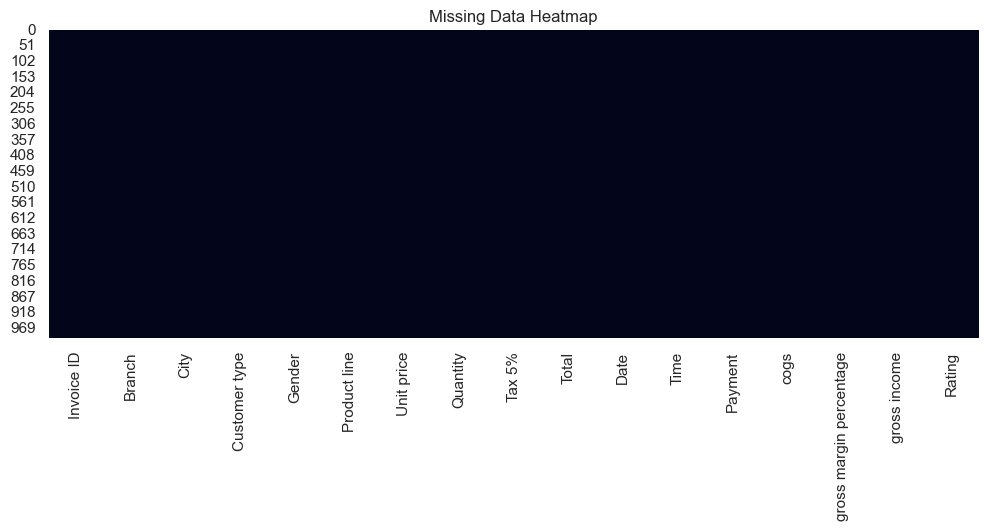

In [9]:
#Missing Data Visualization(Heatmap)
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()


Step 3 — Distribution Analysis (Histograms & Boxplots)

#distribution analysis
#Histogram (numeric columns)

num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram: {col}")
    plt.show()


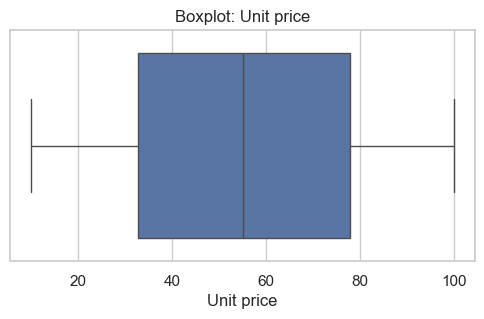

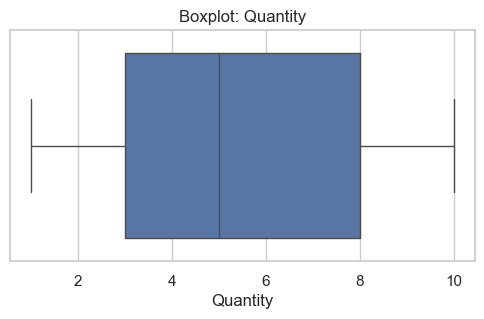

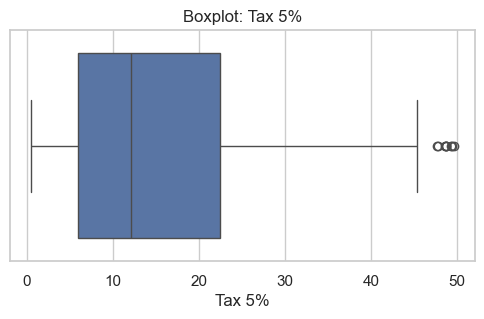

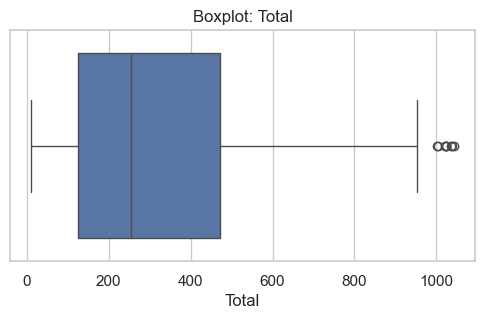

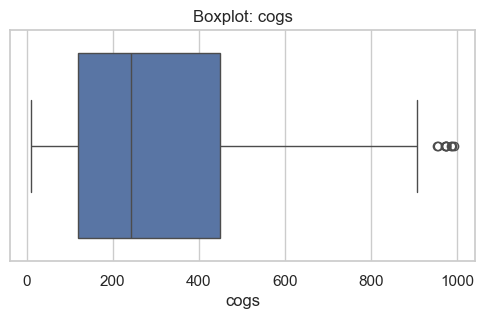

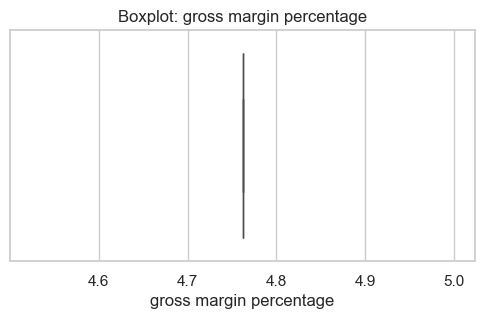

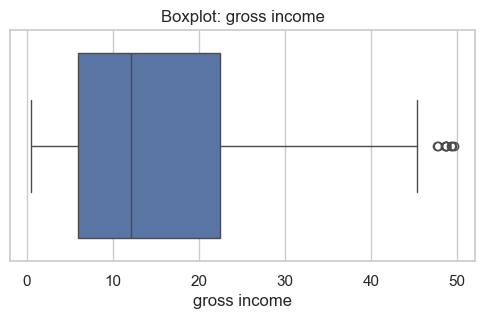

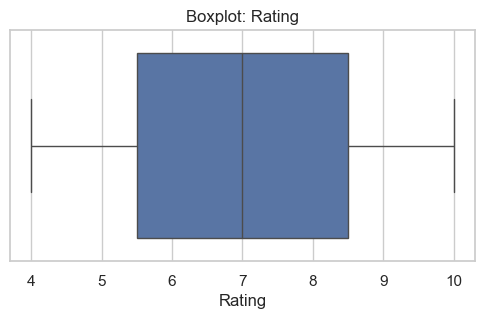

In [11]:
#Boxplots
#outlier detection - numeric columns
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

Step 4 — Category Analysis (Countplots)

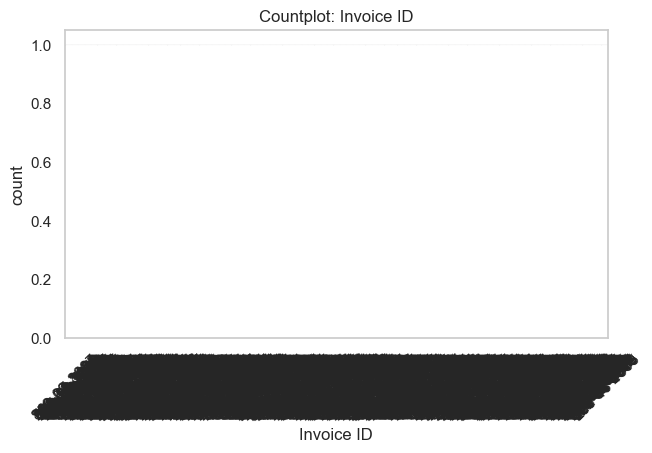

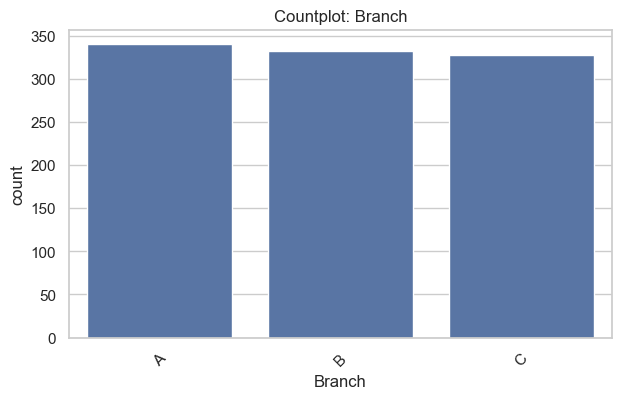

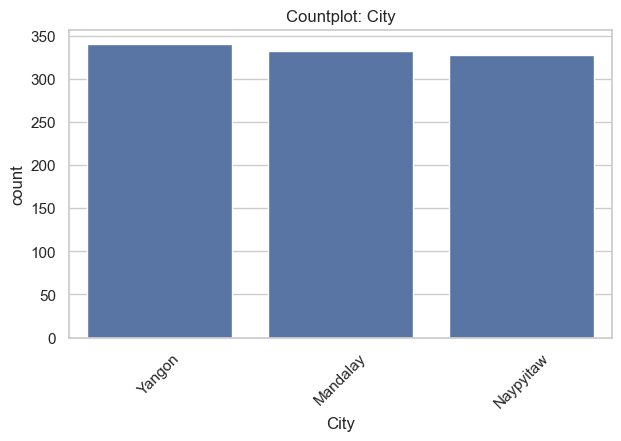

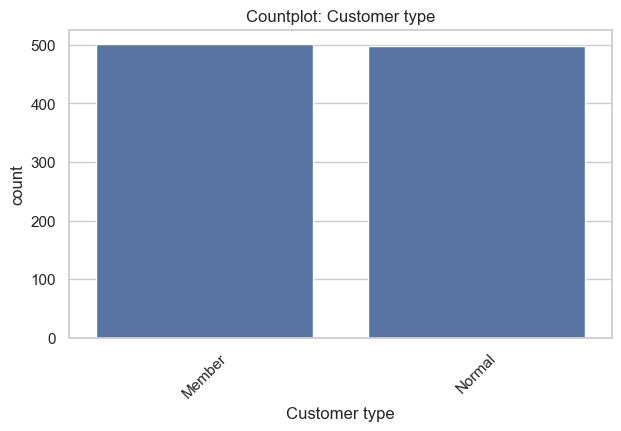

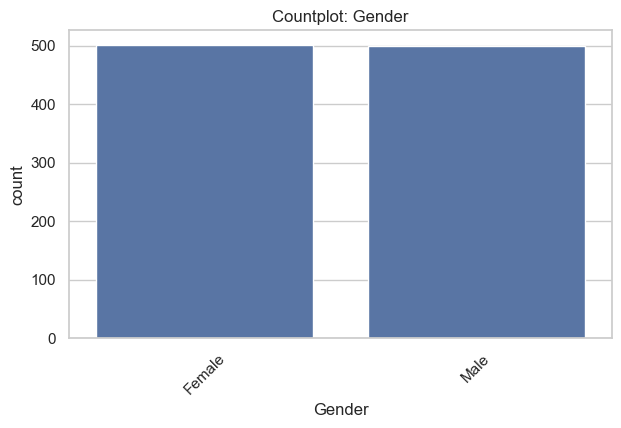

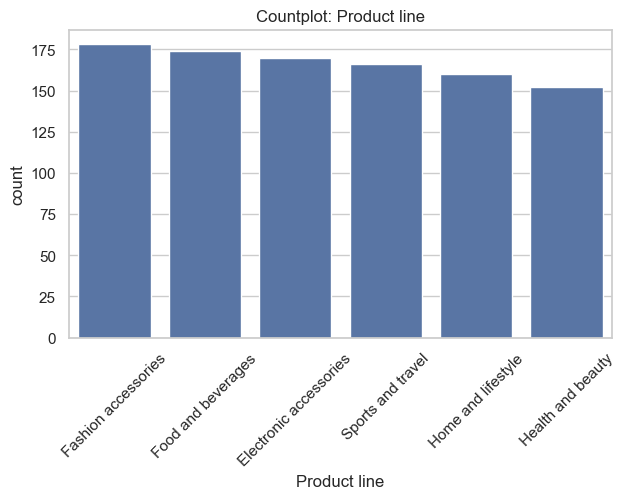

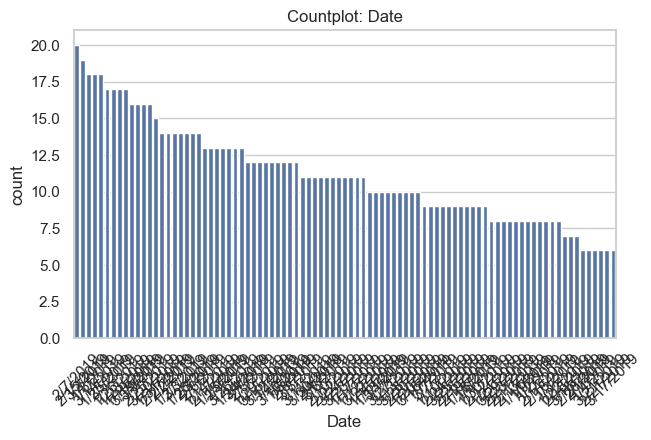

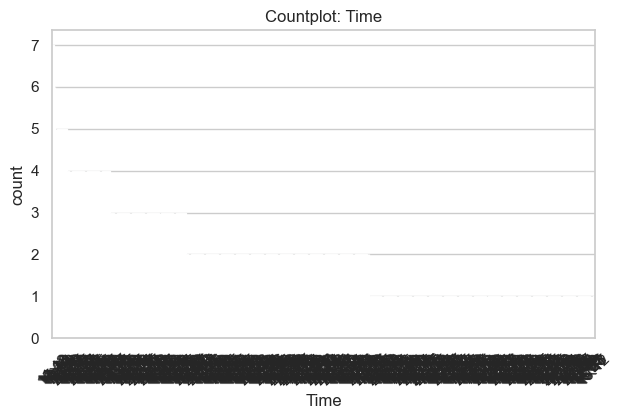

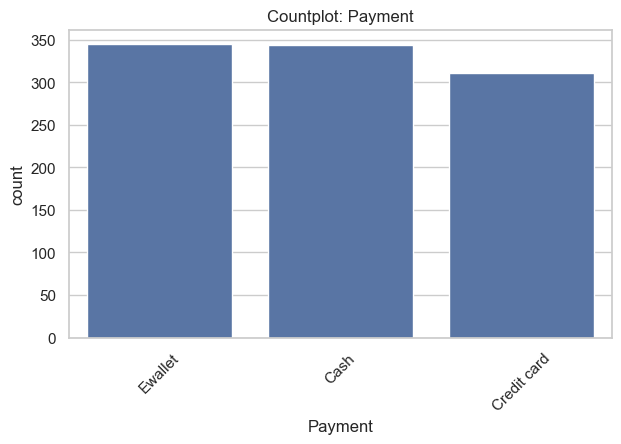

In [13]:
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Countplot: {col}")
    plt.show()

Step 5 — Pairplot (Relationship Overview)

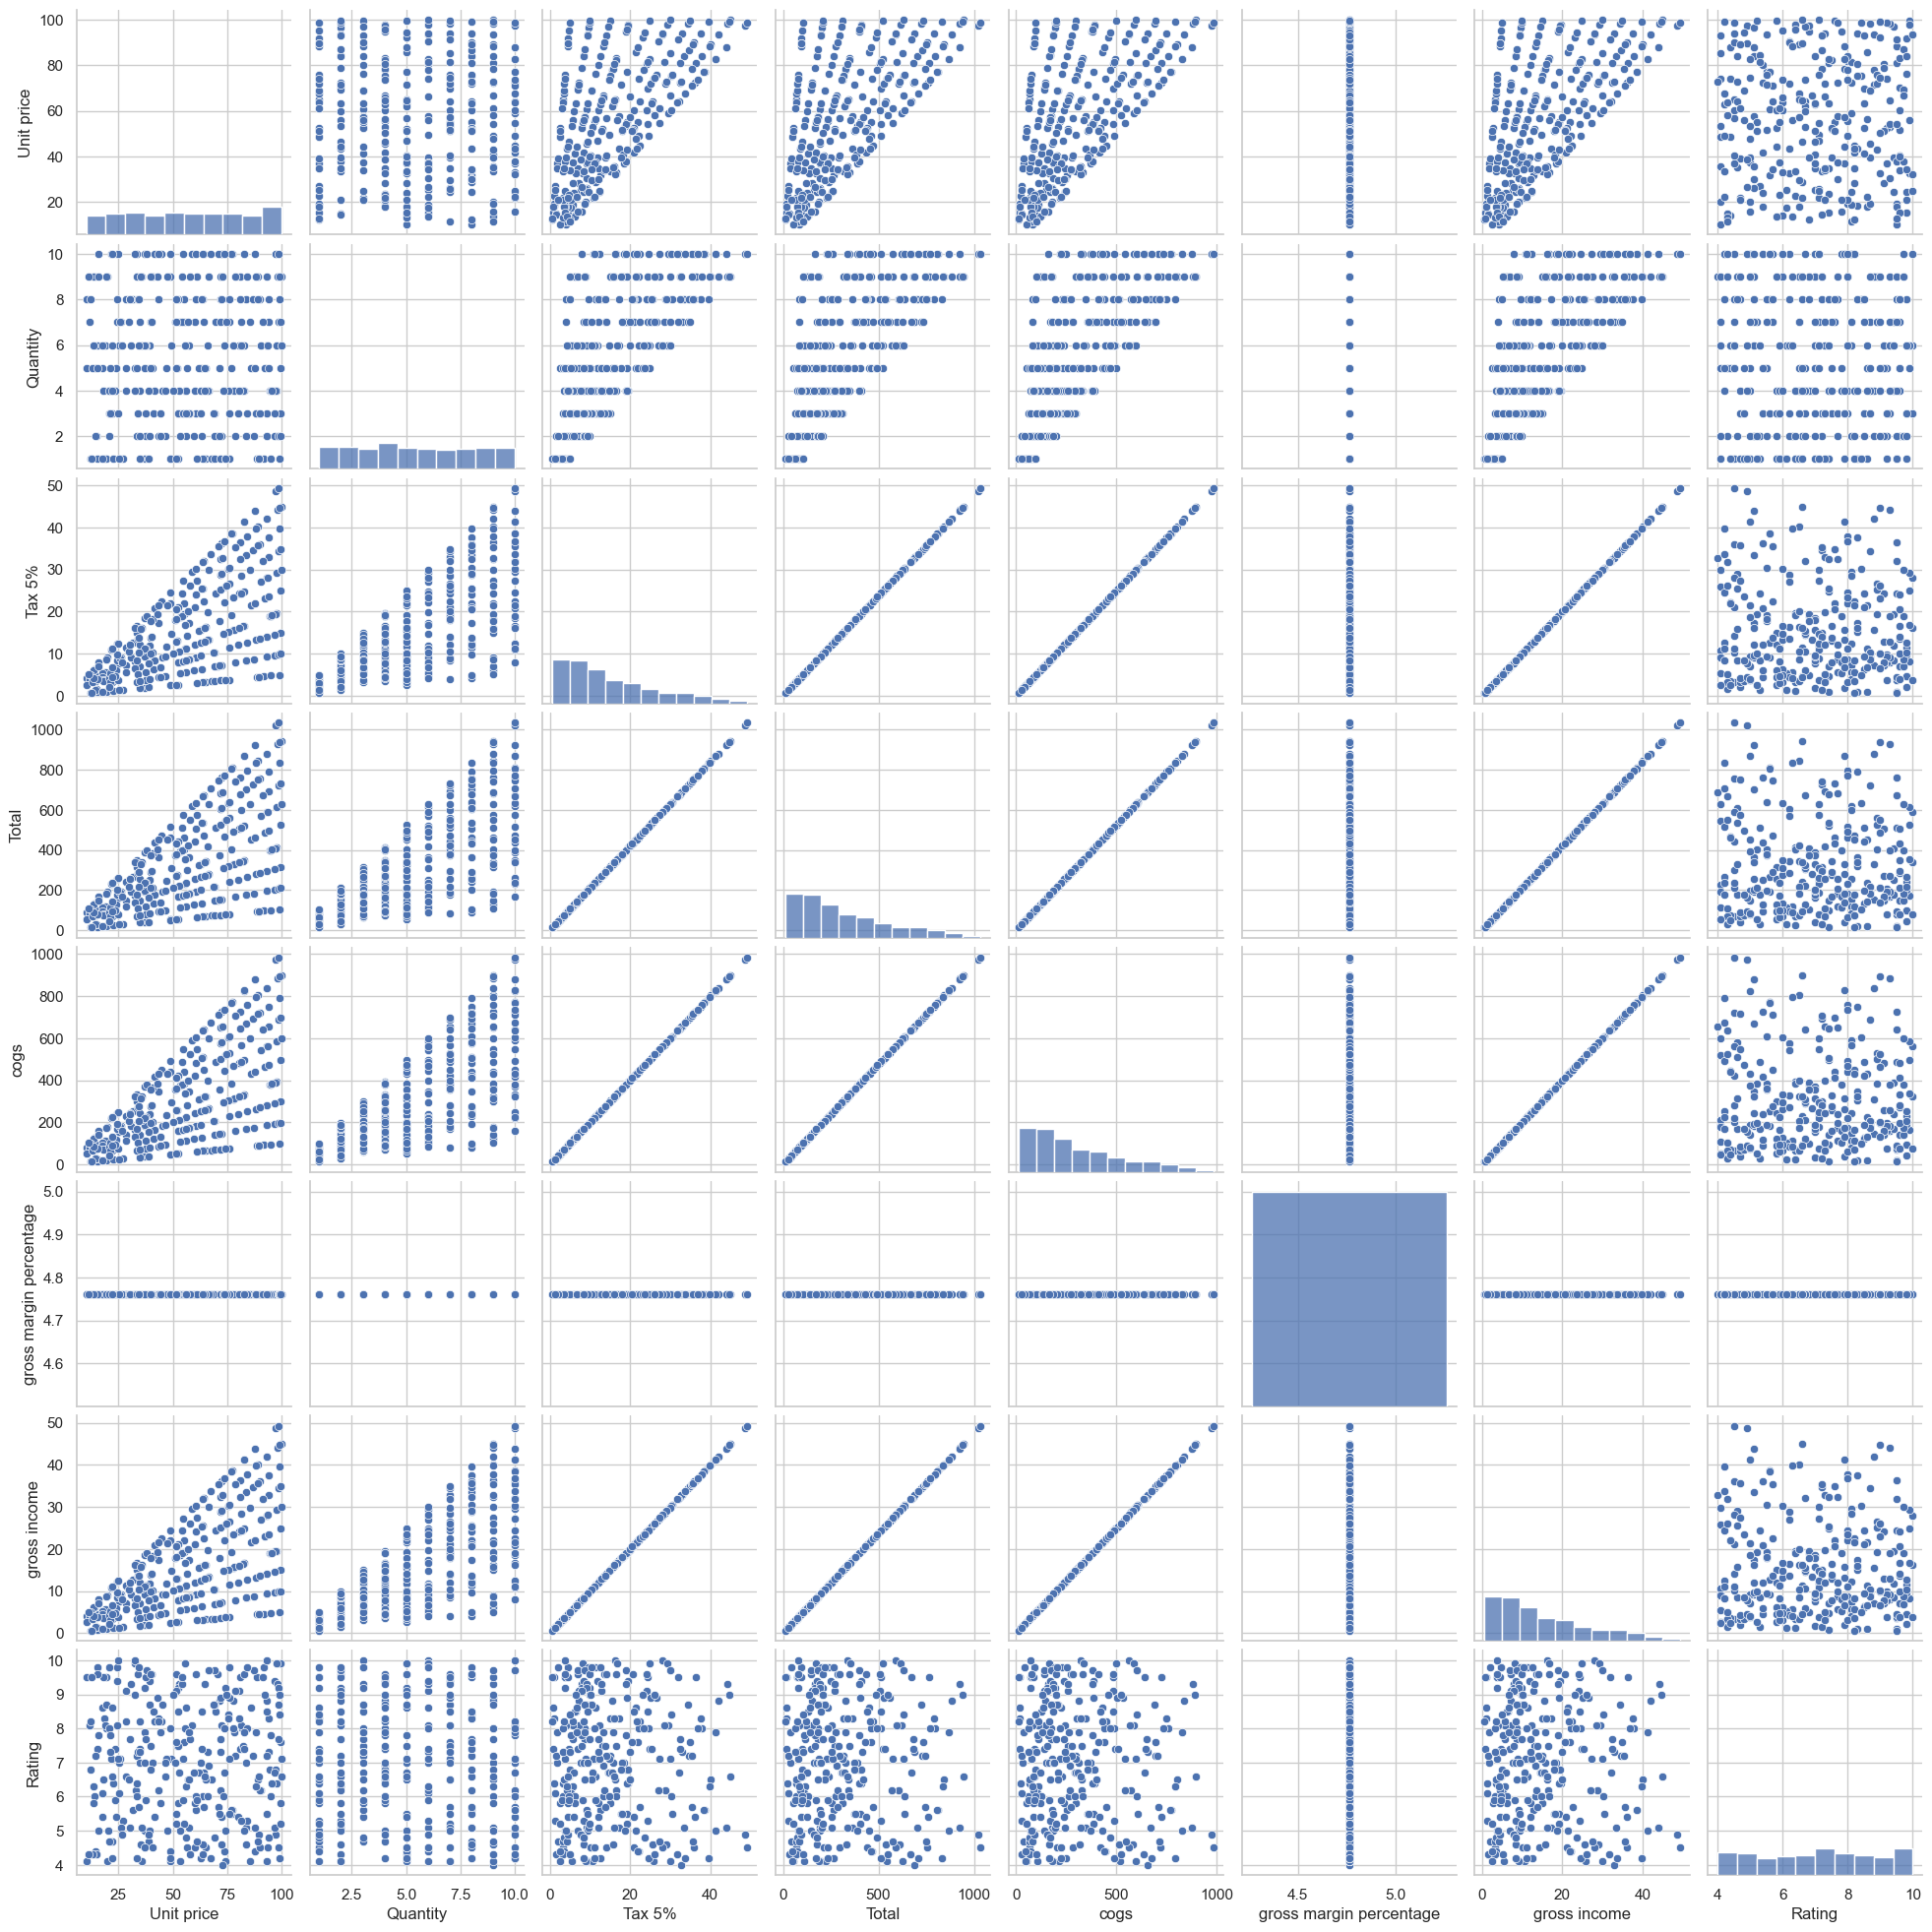

In [14]:
sns.pairplot(df[num_cols].sample(min(300, len(df))))
plt.show()

Step 6 — Correlation Heatmap

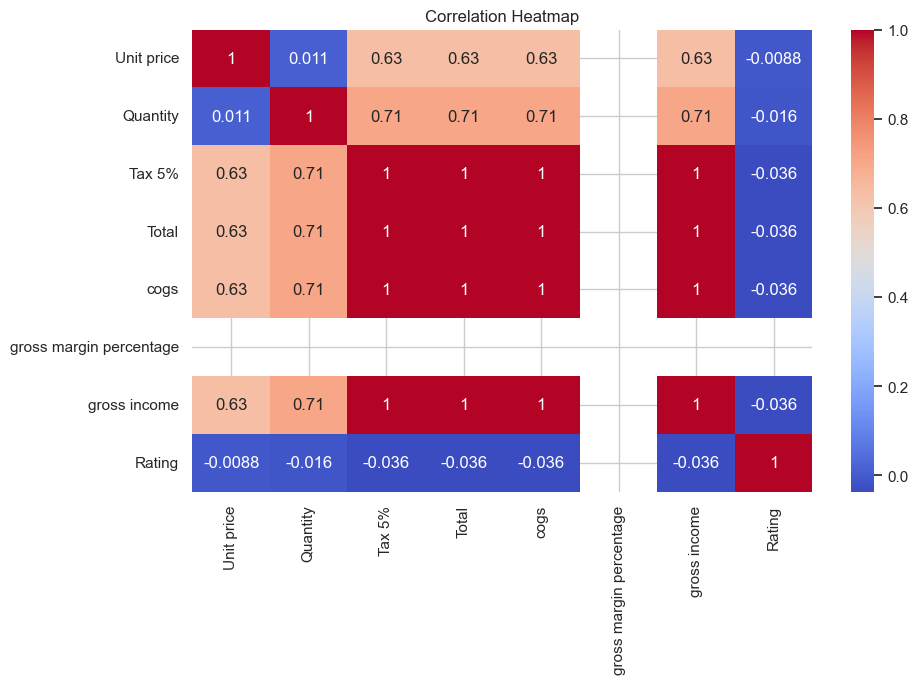

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(),annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Step 7 — Groupby Analysis (Business Insights)

In [17]:
#Sales by Product Line
if 'Product line' in df.columns and 'Total' in df.columns:
    print(df.groupby('Product line')['Total'].sum().sort_values(ascending=False))

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


In [18]:
#Sales by Gender

if 'Gender' in df.columns and 'Total' in df.columns:
    print(df.groupby('Gender')['Total'].mean())

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64


In [19]:
# Sales By Branch 

if 'Branch' in df.columns and 'Total' in df.columns:
    print(df.groupby('Branch')['Total'].sum())


Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


In [20]:
#Average Rating by Product Line (if available)

if 'Rating' in df.columns:
    print(df.groupby('Product line')['Rating'].mean())

Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


Step 8 — Outlier Analysis (IQR Method)

In [21]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Unit price: 0 outliers
Quantity: 0 outliers
Tax 5%: 9 outliers
Total: 9 outliers
cogs: 9 outliers
gross margin percentage: 0 outliers
gross income: 9 outliers
Rating: 0 outliers


Step 9 — Skewness & Log Transform (If Needed)

In [22]:
df[num_cols].skew()

Unit price                 0.007077
Quantity                   0.012941
Tax 5%                     0.892570
Total                      0.892570
cogs                       0.892570
gross margin percentage    0.000000
gross income               0.892570
Rating                     0.009010
dtype: float64

In [24]:
import numpy as np

cols_to_transform = ['Total', 'cogs', 'gross income', 'Tax 5%']

for col in cols_to_transform:
    df[f'log_{col}'] = np.log1p(df[col])